In [1]:
# import libraries
import numpy as np
import pandas as pd
# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')
# using 'unicode_escape' to avoid encoding error

In [9]:
# first 5 rows of data, analyzing dataset of diwali sales and gaining important insights 
data.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [4]:
# how many raws and columns in dataframe
data.shape

(11251, 15)

In [6]:
# information about datatypes, null values in dataframe
data.info()
# we can see some values in Amount column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# status, unnamed1 columns have all null values, that's why deleting those columns.
data.drop(['Status','unnamed1'], axis = 1, inplace = True)
data.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


In [8]:
# Amount column consists of some null values, deleting those null values from dataframe
data.dropna(inplace=True)
data.shape

(11239, 13)

In [10]:
# changing datatype of Amount column, from float64 to int64
data['Amount'] = data['Amount'].astype('int')
data.Amount.dtypes

dtype('int32')

In [11]:
# using describe function for specific numeric columns
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


<Axes: xlabel='Gender', ylabel='count'>

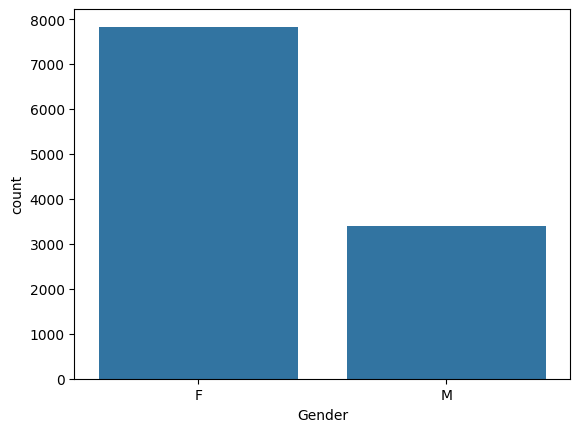

In [12]:
# counting values of Gender column, visualizing it
sns.countplot(x='Gender', data = data)

In [13]:
data.Gender.value_counts()

Gender
F    7832
M    3407
Name: count, dtype: int64

In [17]:
# checking who is spending more money, male or female
data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

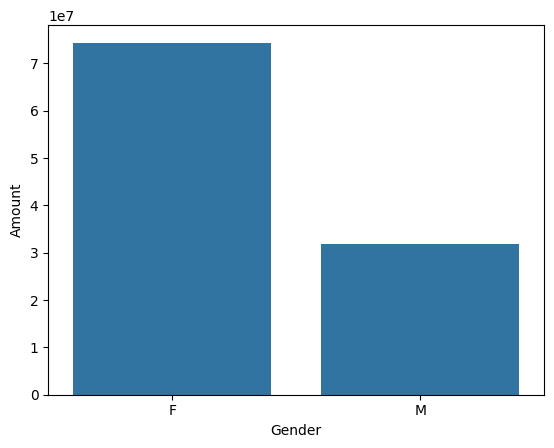

In [18]:
sales_gender = data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_gender)

From above graph, we can see that most of the buyers are females and purchasing power of female are greater than men.

<Axes: xlabel='Age Group', ylabel='count'>

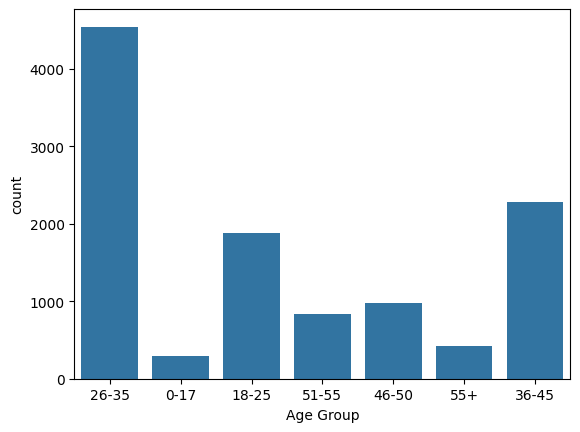

In [19]:
# According to Age group, who spends more
sns.countplot(data = data, x = 'Age Group')

<Axes: xlabel='Age Group', ylabel='count'>

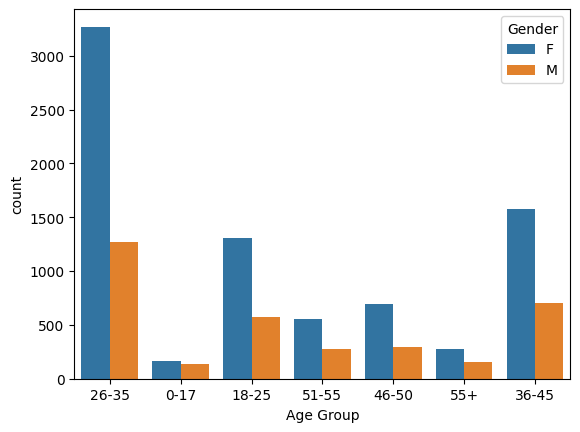

In [20]:
sns.countplot(data = data, x = 'Age Group', hue = 'Gender')


It is clear that females aged between 26 to 35 years tend to spend more money.

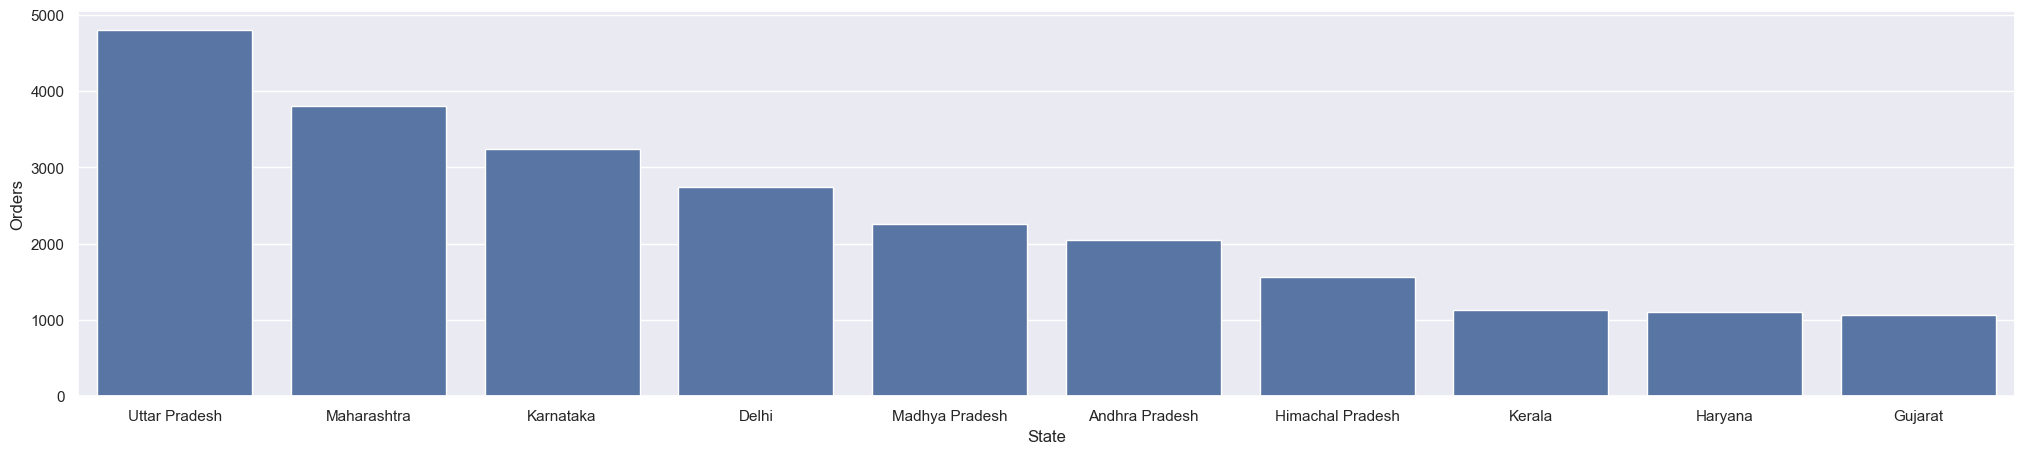

In [27]:
# total number of orders from top 10 states.
sales_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)
sns.barplot( data = sales_state, x = 'State' , y = 'Orders')
sns.set(rc={'figure.figsize':(25,5)})

top 3 states with high purchasing power are: Uttar pradesh, Maharashtra and Karnataka


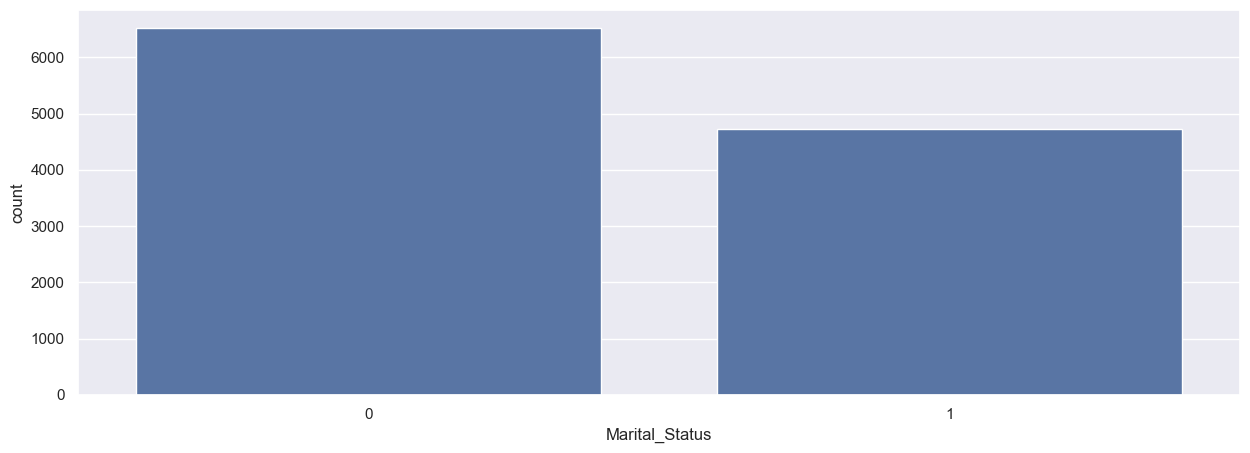

In [30]:
# married or unmarried, who spends more
sns.countplot(data = data, x = 'Marital_Status')
sns.set(rc={'figure.figsize':(10,5)})

In [31]:
data.Marital_Status.value_counts()

Marital_Status
0    6518
1    4721
Name: count, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

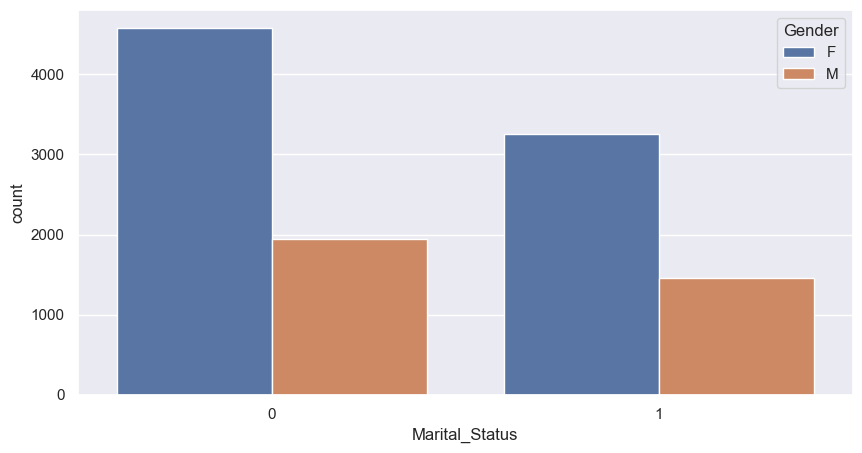

In [35]:
sns.countplot(data = data, x = 'Marital_Status', hue = 'Gender')

Married Females are more likely to spend than married males.

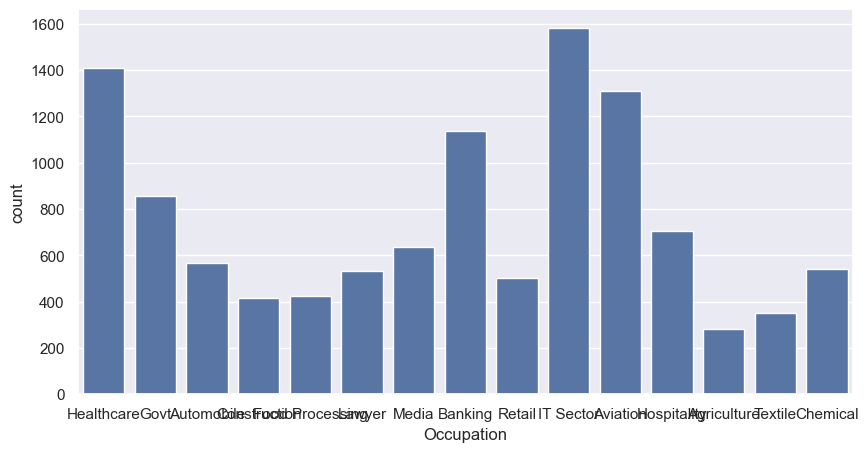

In [38]:
# Occupation wise who spends more
sns.countplot(data = data, x = 'Occupation')
sns.set(rc={'figure.figsize':(25,5)})

people working in IT sector, healthcare and Aviation are spending more

<Axes: xlabel='Product_Category', ylabel='count'>

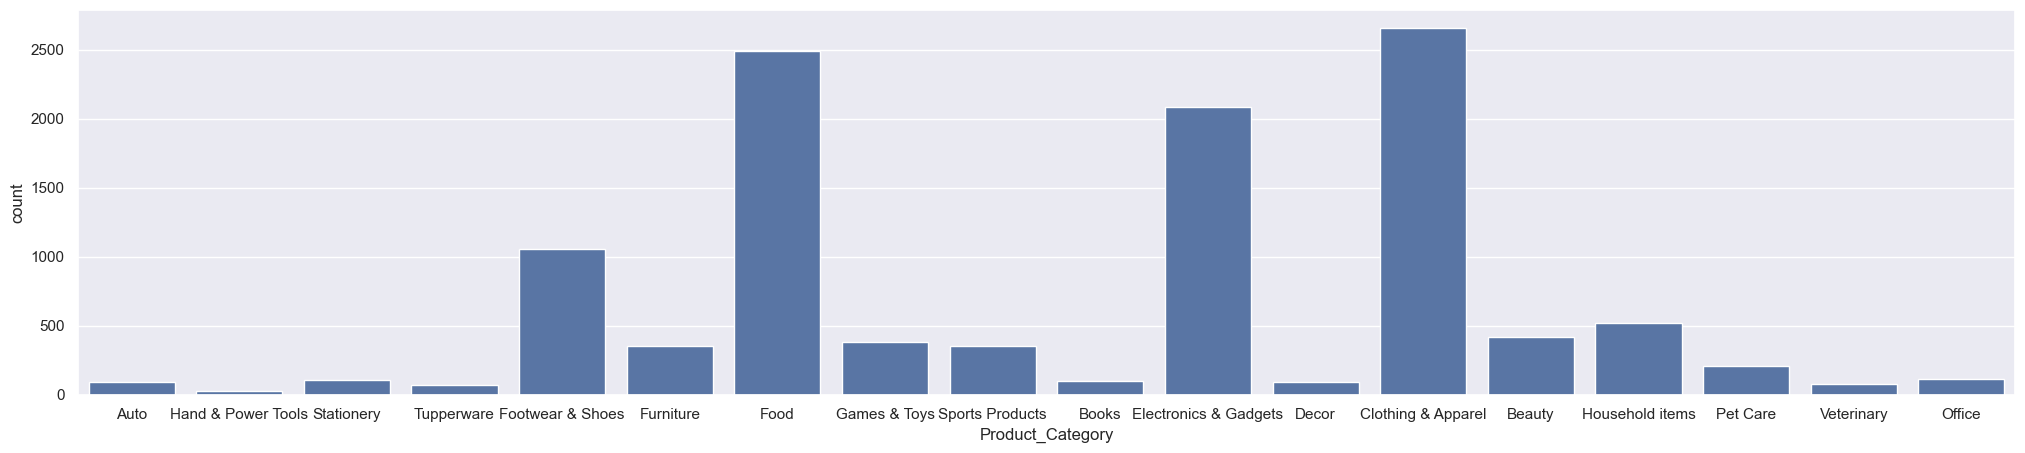

In [39]:
# which product selling more
sns.countplot(data = data, x = 'Product_Category')

<Axes: xlabel='Product_Category', ylabel='Amount'>

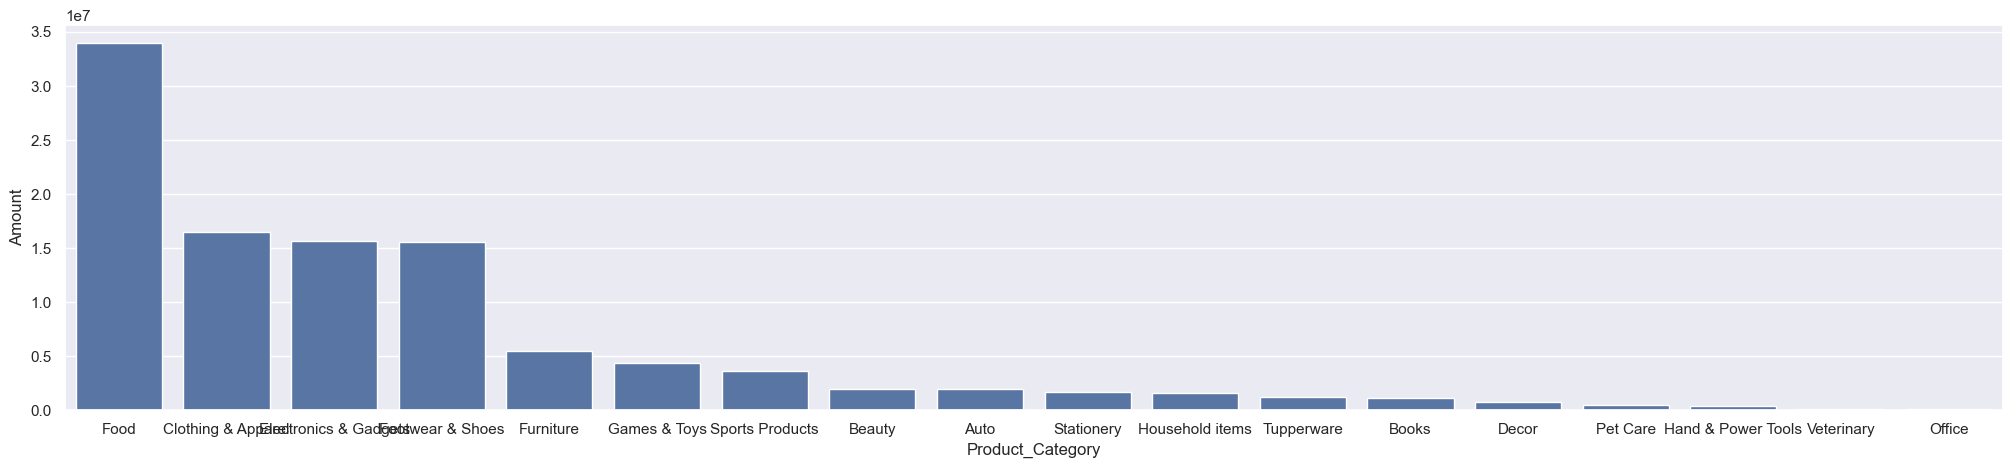

In [42]:
product_sales = data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data = product_sales, x = 'Product_Category', y = 'Amount')

From above graph, we can see that most of the sold products are from food, clothing and Electronics category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

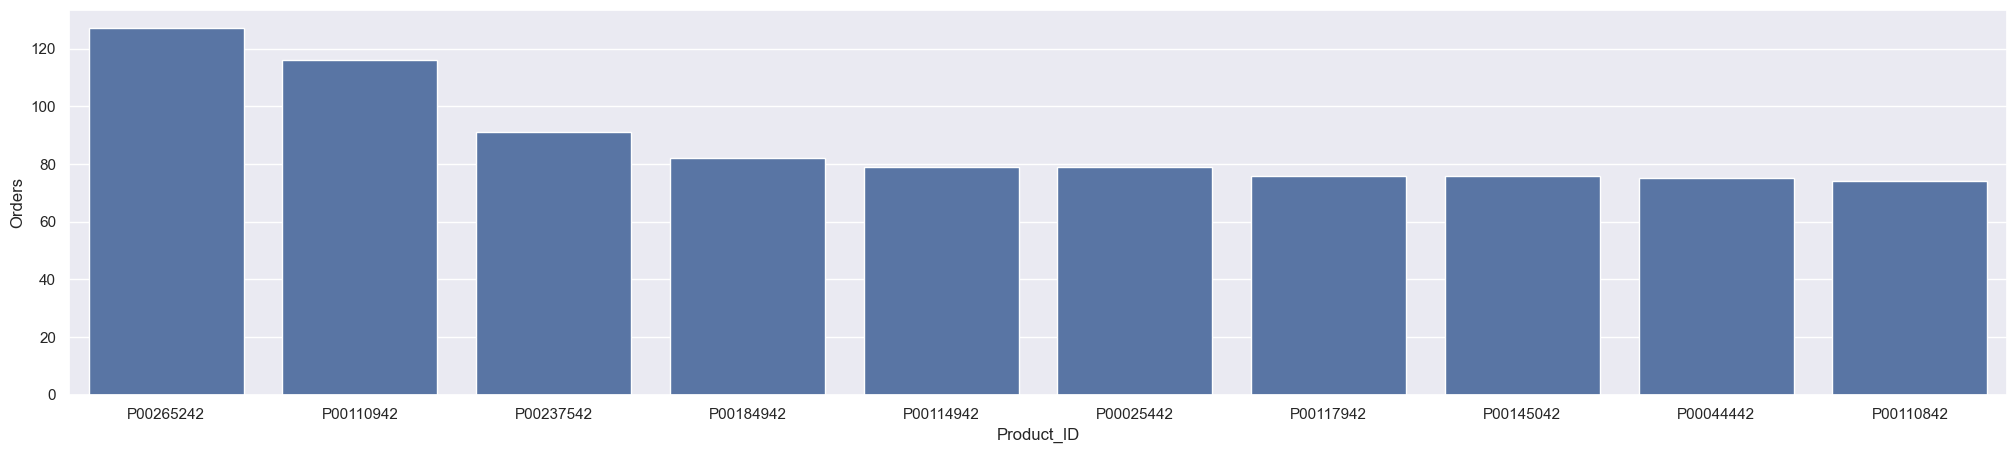

In [43]:
# top 10 selling products
top_products = data.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data = top_products, x = 'Product_ID', y = 'Orders')

In [44]:
data[data['Product_ID'] == 'P00265242']

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
62,1001687,Bruce,P00265242,F,26-35,33,0,Maharashtra,Western,Govt,Stationery,4,21325
208,1004161,Murray,P00265242,F,46-50,50,1,Uttar Pradesh,Central,Banking,Furniture,1,20588
349,1003934,Ann,P00265242,F,26-35,32,0,Karnataka,Southern,Retail,Footwear & Shoes,4,20260
591,1003218,Craig,P00265242,F,55+,63,0,Madhya Pradesh,Central,Agriculture,Food,3,19487
812,1004916,Jeremy,P00265242,F,18-25,20,1,Haryana,Northern,Food Processing,Food,4,19175
963,1003292,Dipali,P00265242,M,51-55,53,1,Gujarat,Western,Aviation,Food,1,18959
1309,1001599,Akshata,P00265242,F,26-35,35,0,Delhi,Central,Food Processing,Footwear & Shoes,1,16506
1347,1004220,Hughes,P00265242,F,36-45,38,0,Delhi,Central,Retail,Footwear & Shoes,2,16451
1561,1001434,Steven,P00265242,F,0-17,12,0,Himachal Pradesh,Northern,Textile,Games & Toys,2,16149
1630,1000965,Cortes,P00265242,F,55+,81,1,Madhya Pradesh,Central,IT Sector,Food,3,15917


Conclusion : Married women age group 26-35 years from Uttar Pradesh, Maharashtra and Karnataka working in IT, Healthcare and Aviation sector are more likely to buy products from Food, Clothing and Electronics Company.

Thank You !!!